# 1.4 Supervised Learning Algorithms Part 1 

## 1. Import libraries and load data
## 2. Prep data and run k-nearest neighbor algorithm
## 3. Create confusion matrix

### 1. Import libraries and load data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [16]:
#Create a path to where your data is stored.
path = r'C:\Users\User\250216_ClimateWins Analysis\Data Sets'

In [17]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [18]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [19]:
# Import the pleasant weather data
pwdf = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pwdf

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Prep data and run k-nearest neighbor algorithm

In [21]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [22]:
### Create an 'X' matrix by dropping the unneeded columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pwdf.drop(['DATE'], axis=1)

In [23]:
### Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
# Define k values from 1 to 6
k_range = np.arange(1, 6)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []

# Loop through each k value
for i, k in enumerate(k_range):
    print(f"Running KNN with k = {k}")
    
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Wrap it in MultiOutputClassifier
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Compute training and testing accuracy
    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)

# Print final results
print(f"Final Training Accuracies: {train_acc}")
print(f"Final Testing Accuracies: {test_acc}")


Running KNN with k = 1
Running KNN with k = 2
Running KNN with k = 3
Running KNN with k = 4
Running KNN with k = 5
Final Training Accuracies: [1.         0.55333488 0.55618173 0.51214269 0.51528004]
Final Testing Accuracies: [0.43011502 0.43586616 0.44649704 0.44771697 0.45852213]


<function matplotlib.pyplot.show(close=None, block=None)>

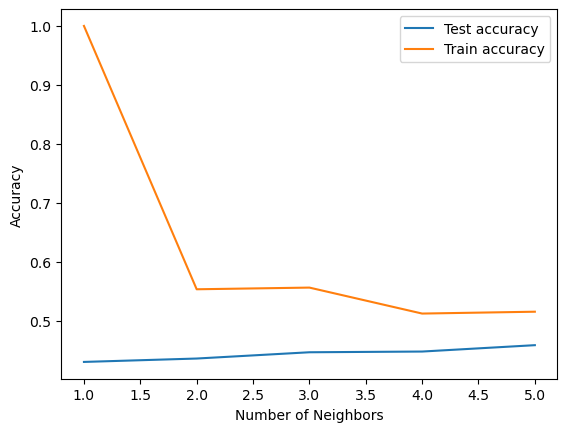

In [25]:
### plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

### 3. Create confusion matrix

y_train columns: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']
y_pred_train columns: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']
Extracted locations: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weath

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Training CM saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\train_cm.png


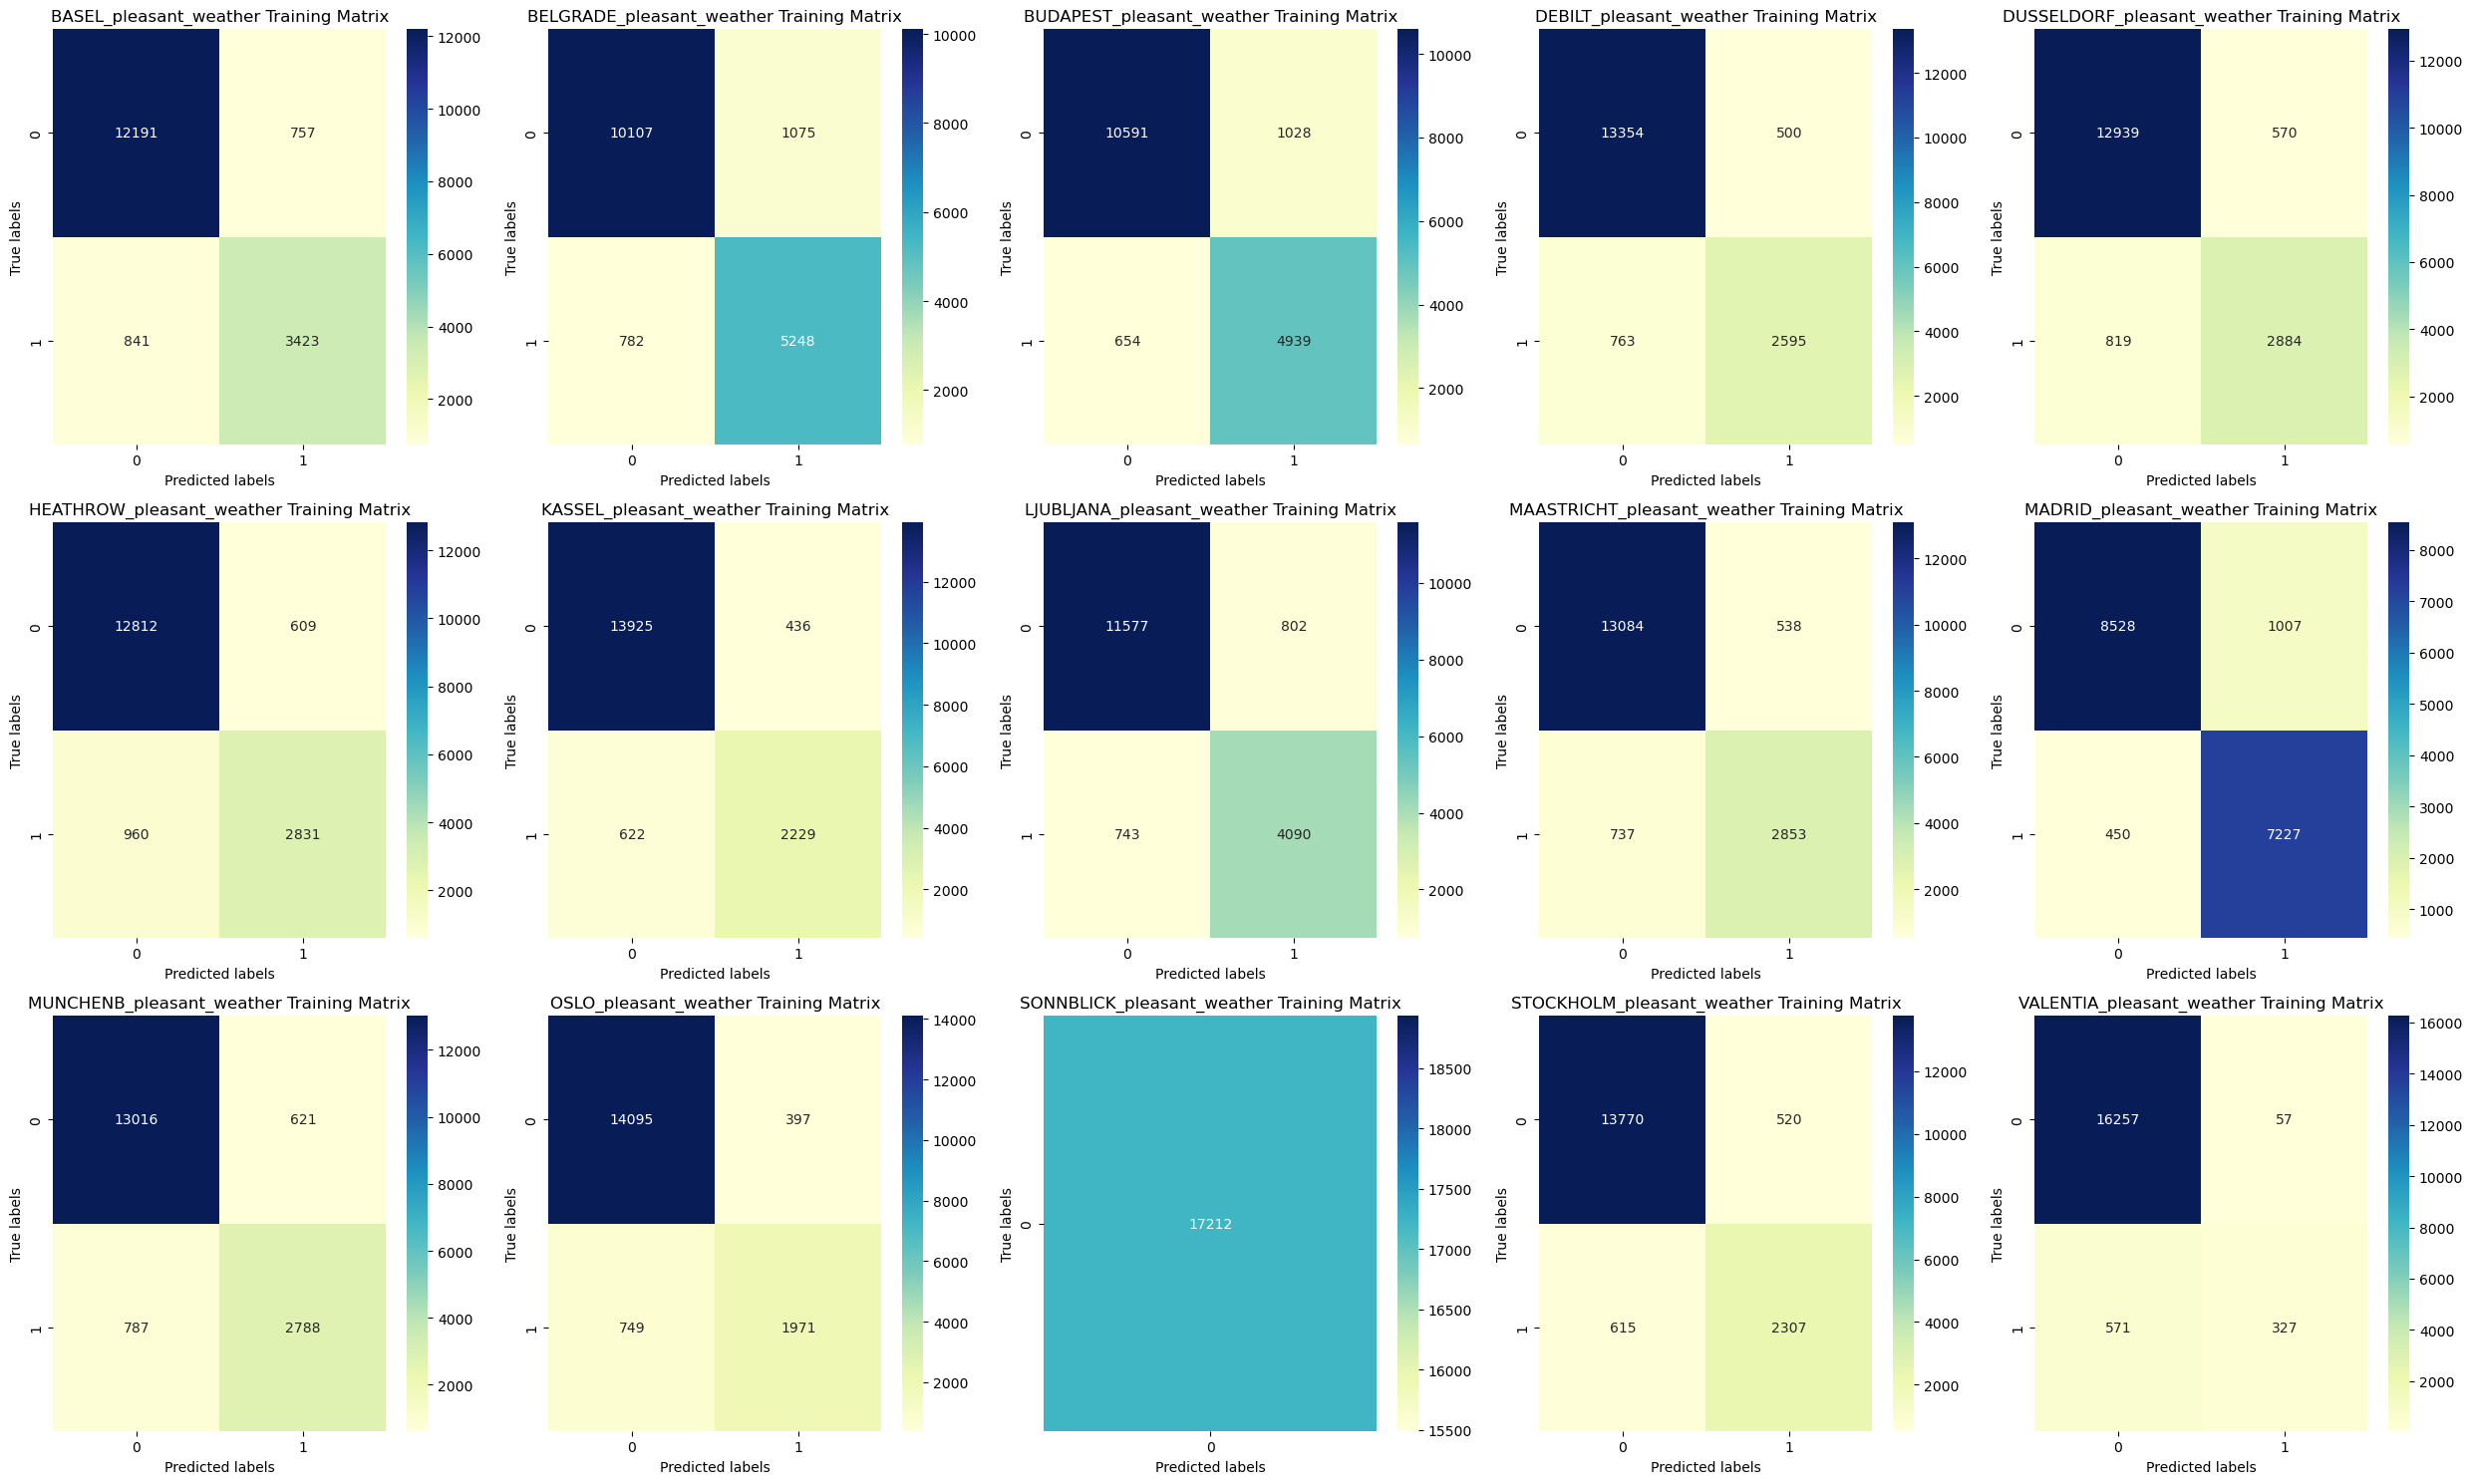

In [34]:
# Define save directory
save_dir = r"C:\Users\User\250216_ClimateWins Analysis\Visualisations"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

# Ensure y_pred_train is aligned correctly
y_pred_train = classifier.predict(X_train)  # Get predictions on training set
y_pred_train = pd.DataFrame(y_pred_train, columns=y_train.columns)  # Convert to DataFrame

# Debugging: Print available columns
print("y_train columns:", list(y_train.columns))
print("y_pred_train columns:", list(y_pred_train.columns))

# Extract locations correctly (keep full column names)
key = "_pleasant_weather"
locations = sorted([col for col in y_train.columns if key in col])  

# Debugging: Print extracted locations
print("Extracted locations:", locations)

# Define dynamic subplot grid
num_locations = len(locations)
rows, cols = np.ceil(num_locations / 5).astype(int), min(5, num_locations)

fig, ax = plt.subplots(rows, cols, figsize=(25, 5 * rows))
ax = ax.flatten()  # Convert to 1D array for easy indexing

# Loop through locations and plot confusion matrices
for count, name in enumerate(locations):
    if name not in y_train.columns or name not in y_pred_train.columns:
        print(f"Warning: {name} not found in y_train or y_pred_train. Skipping...")
        continue  # Skip missing locations

    cm = confusion_matrix(y_train[name], y_pred_train[name])  # FIXED: Using full column name

    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", ax=ax[count])

    # Labels, title, and ticks
    ax[count].set_xlabel('Predicted labels')
    ax[count].set_ylabel('True labels')
    ax[count].set_title(f'{name} Training Matrix')

plt.tight_layout()

# Save Training CM
train_cm_path = os.path.join(save_dir, "train_cm.png")
plt.savefig(train_cm_path, dpi=300, bbox_inches="tight")
print(f"Training CM saved at: {train_cm_path}")

plt.show()  # Show the plot after saving

y_test columns: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']
y_pred_test columns: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']
Extracted locations: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Test CM saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\test_cm.png


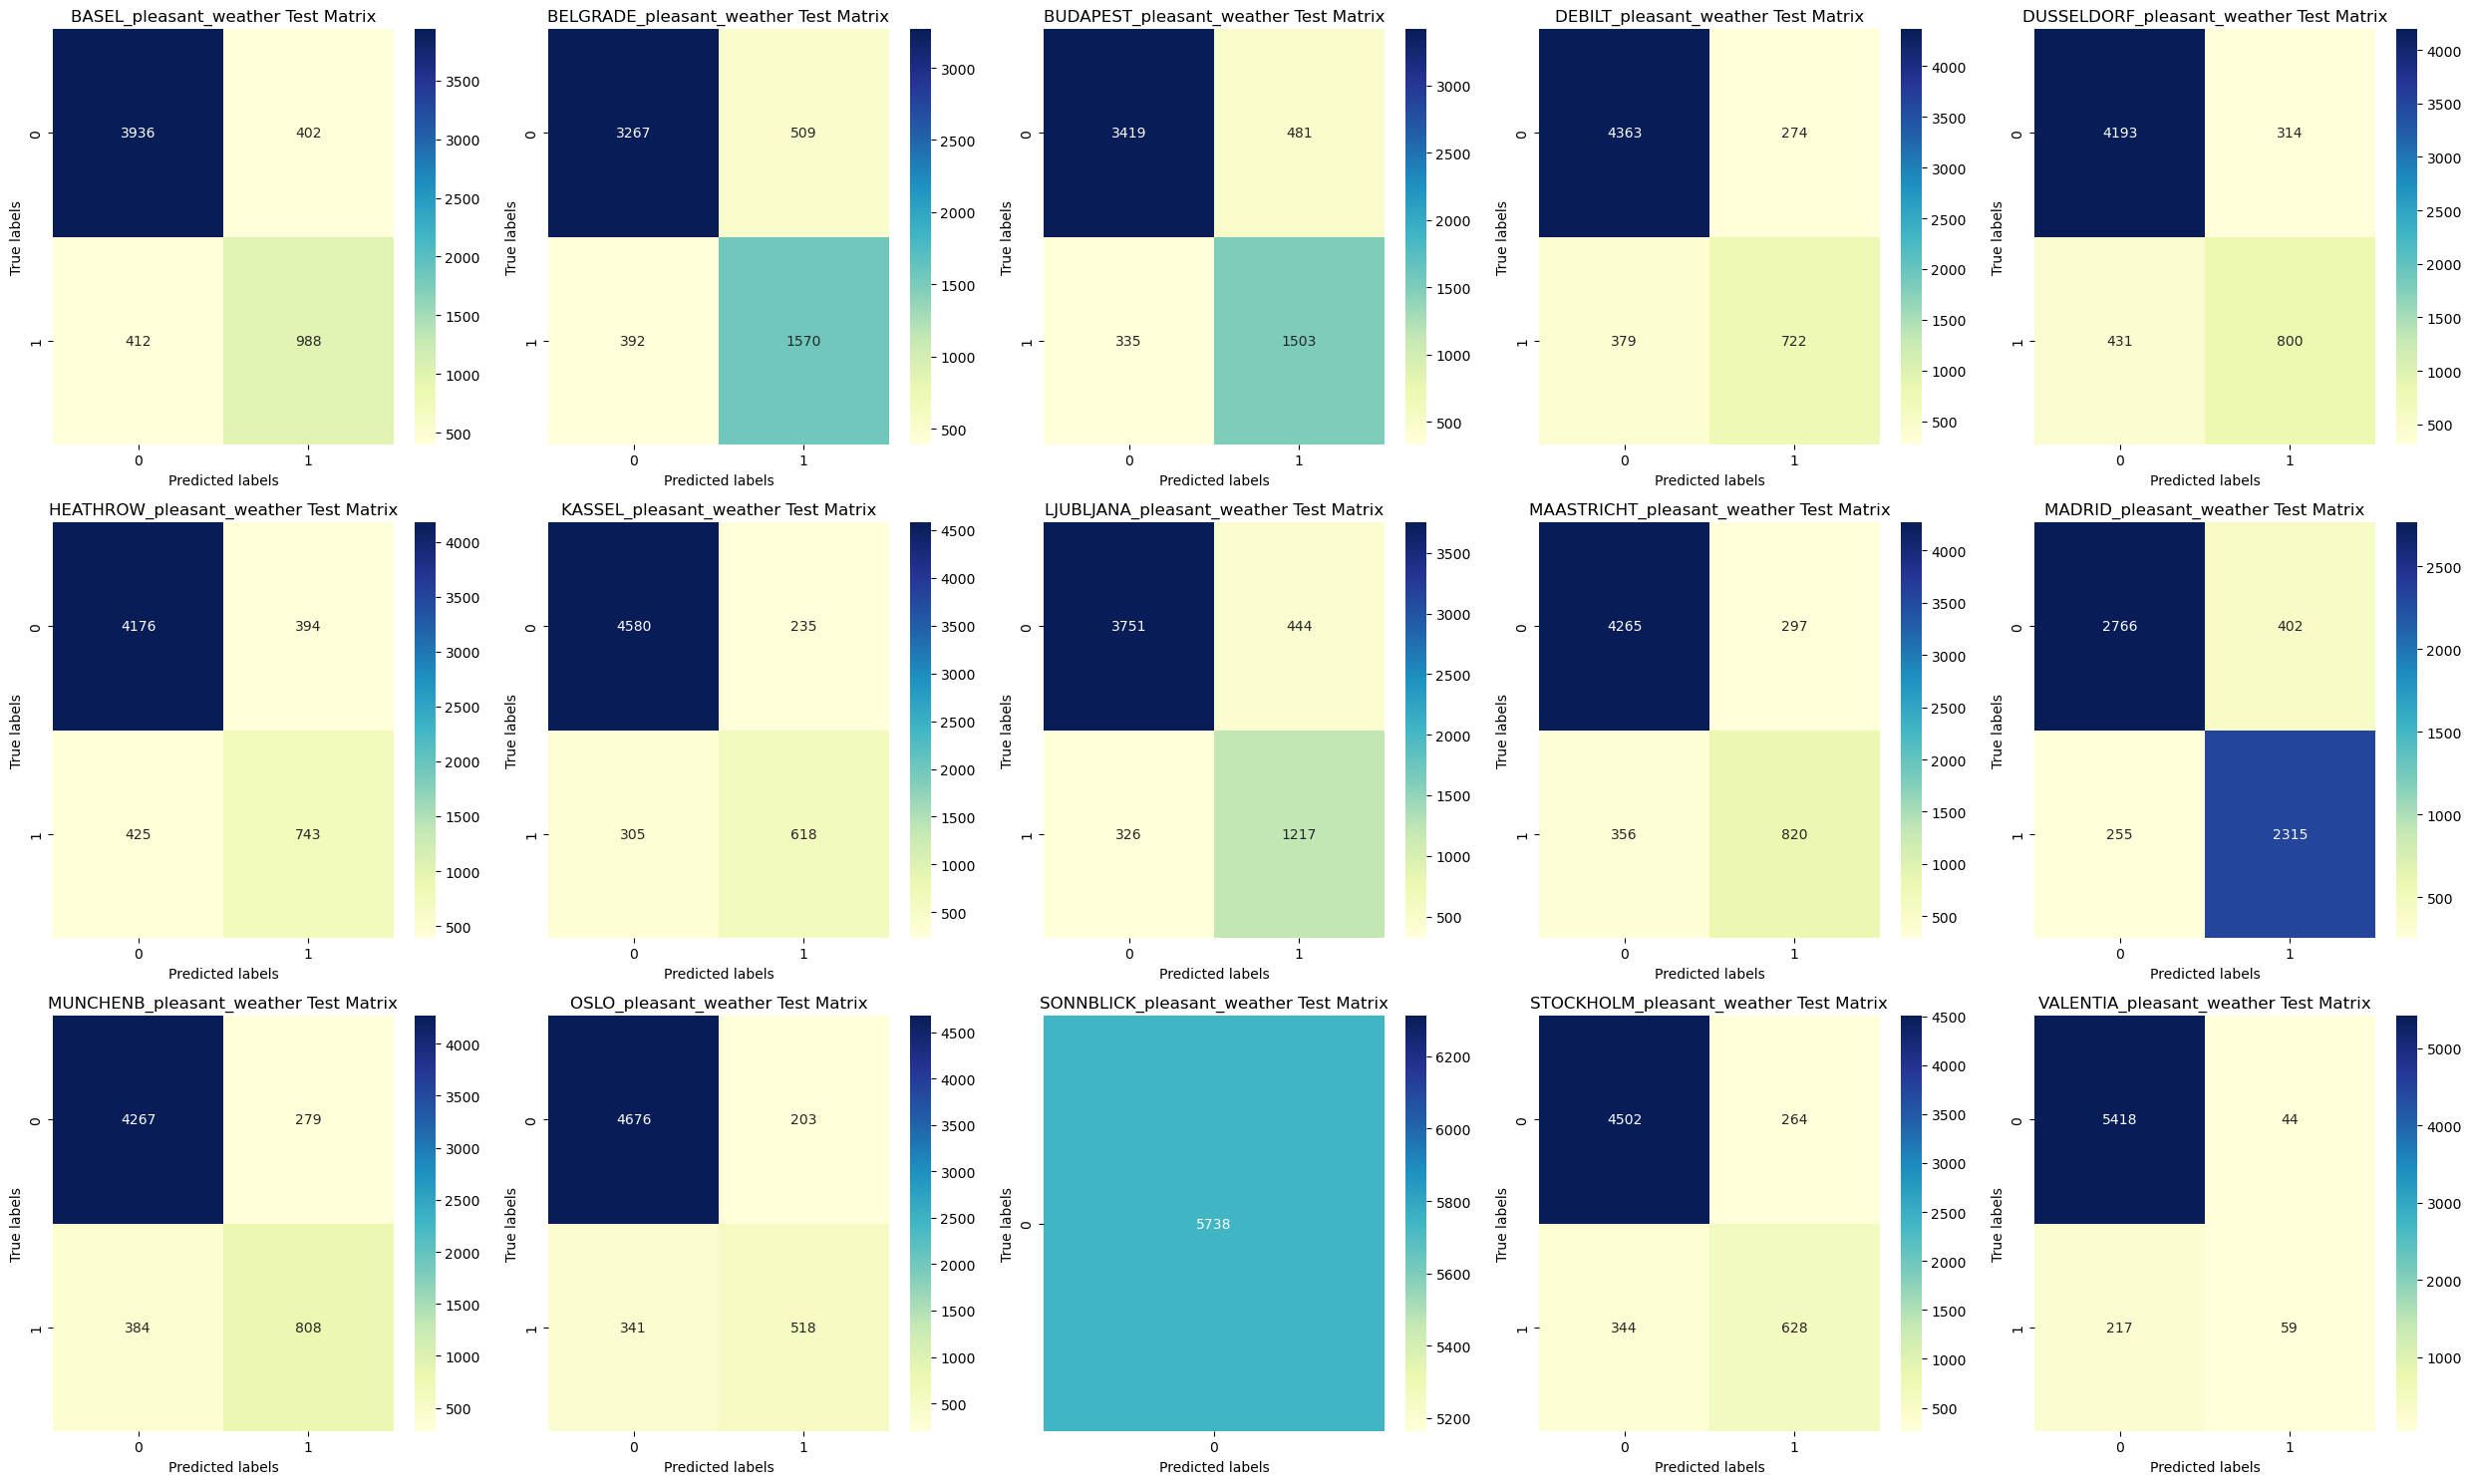

In [36]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define save directory
save_dir = r"C:\Users\User\250216_ClimateWins Analysis\Visualisations"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

# Ensure y_pred_test is aligned correctly
y_pred_test = classifier.predict(X_test)  # Get predictions on test set
y_pred_test = pd.DataFrame(y_pred_test, columns=y_test.columns)  # Convert to DataFrame

# Debugging: Print available columns
print("y_test columns:", list(y_test.columns))
print("y_pred_test columns:", list(y_pred_test.columns))

# Extract locations correctly (keep full column names)
key = "_pleasant_weather"
locations = sorted([col for col in y_test.columns if key in col])  

# Debugging: Print extracted locations
print("Extracted locations:", locations)

# Define dynamic subplot grid
num_locations = len(locations)
rows, cols = np.ceil(num_locations / 5).astype(int), min(5, num_locations)

fig, ax = plt.subplots(rows, cols, figsize=(25, 5 * rows))
ax = ax.flatten()  # Convert to 1D array for easy indexing

# Loop through locations and plot confusion matrices
for count, name in enumerate(locations):
    if name not in y_test.columns or name not in y_pred_test.columns:
        print(f"Warning: {name} not found in y_test or y_pred_test. Skipping...")
        continue  # Skip missing locations

    cm = confusion_matrix(y_test[name], y_pred_test[name])  # Use full column name

    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", ax=ax[count])

    # Labels, title, and ticks
    ax[count].set_xlabel('Predicted labels')
    ax[count].set_ylabel('True labels')
    ax[count].set_title(f'{name} Test Matrix')

plt.tight_layout()

# Save Test CM
test_cm_path = os.path.join(save_dir, "test_cm.png")
plt.savefig(test_cm_path, dpi=300, bbox_inches="tight")
print(f"Test CM saved at: {test_cm_path}")

plt.show()  # Show the plot after saving
